# GlyphGAN
This is an implementation of GlyphGAN.

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

import torch
from models import build_glyph_gan_generator, build_glyph_gan_critic, get_optimizer
from training import train
USE_GPU = True

data_type = torch.FloatTensor

if USE_GPU and torch.cuda.is_available():
    data_type = torch.cuda.FloatTensor

## Main Training Loop

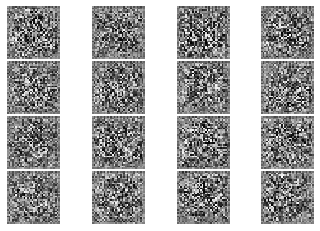


tensor(0)


RuntimeError: bool value of Tensor with more than one value is ambiguous

In [2]:
image_size = (32, 32, 1)

noise_dimension = 100
dimension = 16
batch_size = 128

G = build_glyph_gan_generator(image_size, noise_dimension=noise_dimension, dimension=dimension)
D = build_glyph_gan_critic(batch_size, image_size, dimension)

if USE_GPU and torch.cuda.is_available():
    G.cuda()
    D.cuda()

D_solver = get_optimizer(D)
G_solver = get_optimizer(G)

train(D, G, D_solver, G_solver,
      batch_size=128,
      epoch_count=1,
      noise_dimension=noise_dimension,
      data_type=data_type,
      generate_gif=True)